<a href="https://colab.research.google.com/github/19mddill/ML_Aurelien/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 print("Hey, Welcome to Machine Learning")

Hey, Welcome to Machine Learning


In [2]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

This project requires Python 3.7 or above

In [3]:
import sys

assert sys.version_info >= (3,7)

It also requires Scikit-Learn >= 1.0.1:

In [4]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Get the Data

In [5]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

/tmp/ipython-input-2839428726.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
  housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
housing.shape

(20640, 10)

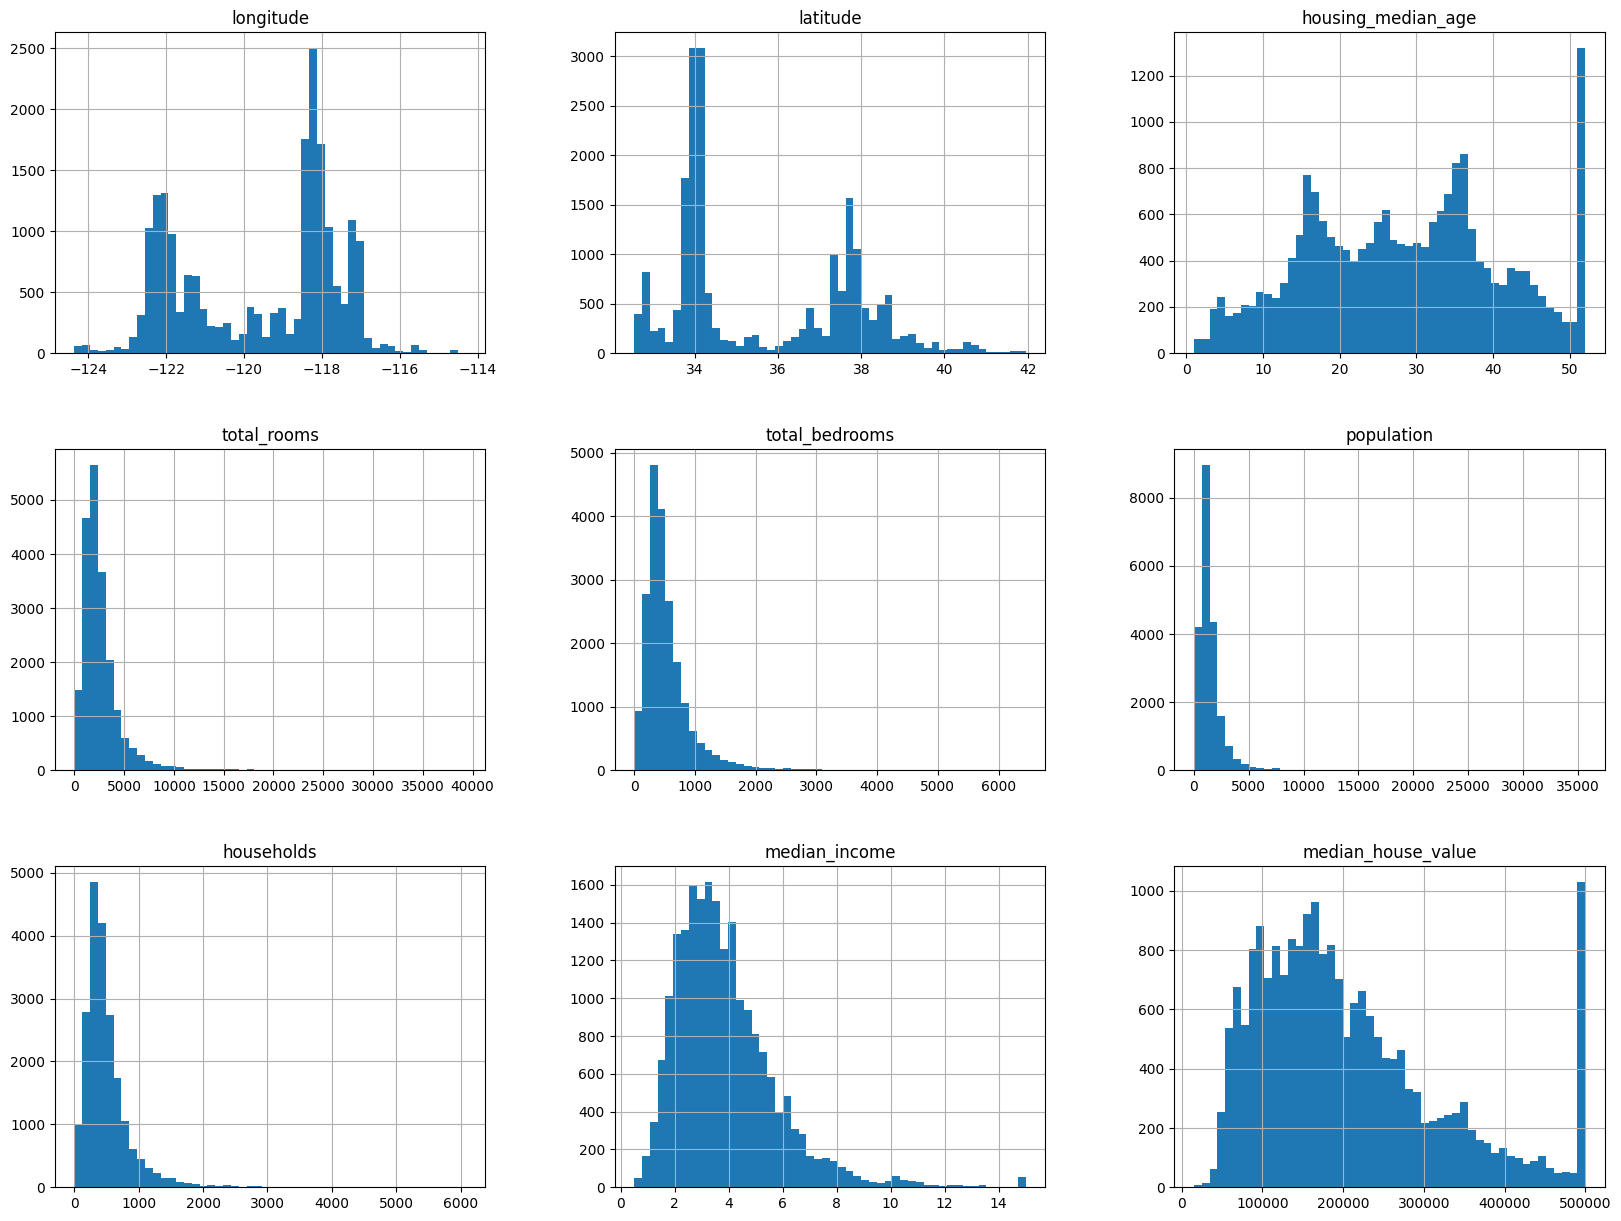

In [11]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

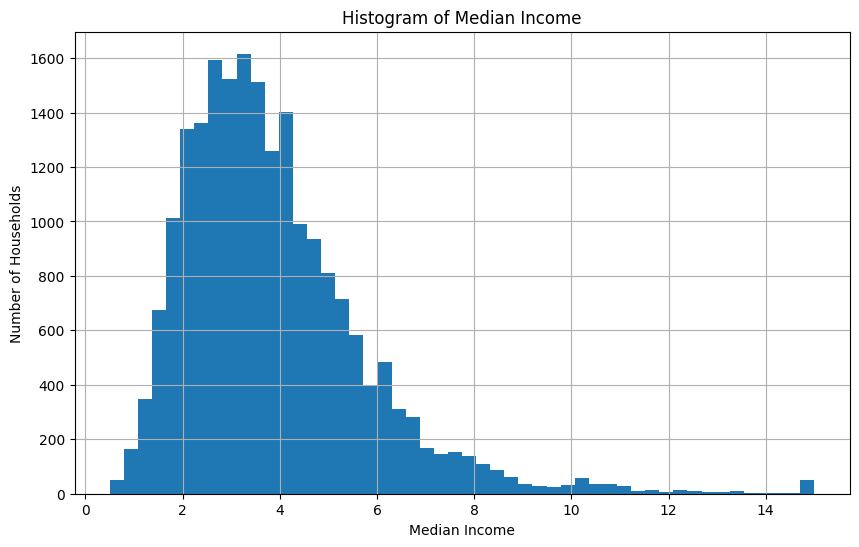

In [12]:
housing["median_income"].hist(bins=50, figsize=(10,6)) # Great
plt.xlabel("Median Income")
plt.ylabel("Number of Households")
plt.title("Histogram of Median Income")
plt.show()


In [13]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [14]:
housing['income_cat'].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


In [15]:
housing['income_cat'].value_counts().sort_index()

,count
income_cat,
1,822
2,6581
3,7236
4,3639
5,2362


<Axes: xlabel='income_cat'>

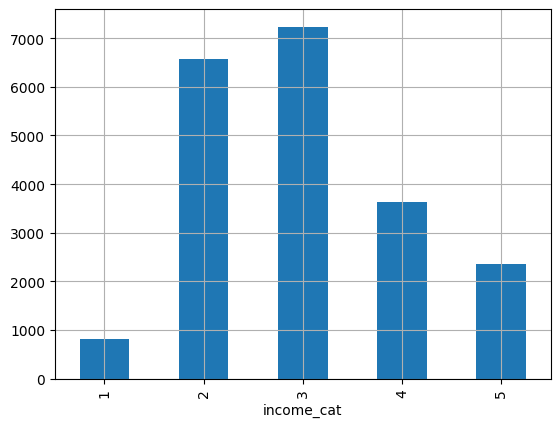

In [16]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=90,grid=True)

In [17]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [19]:
strat_test_set['income_cat'].value_counts().sort_index()

,count
income_cat,
1,165
2,1316
3,1447
4,728
5,472


In [20]:
len(strat_test_set)

4128

In [21]:
strat_test_set['income_cat'].value_counts().sort_index()/len(strat_test_set) * 100

,count
income_cat,
1,3.997093
2,31.879845
3,35.053295
4,17.635659
5,11.434109


In [22]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [23]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [24]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [26]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [27]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
housing = strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

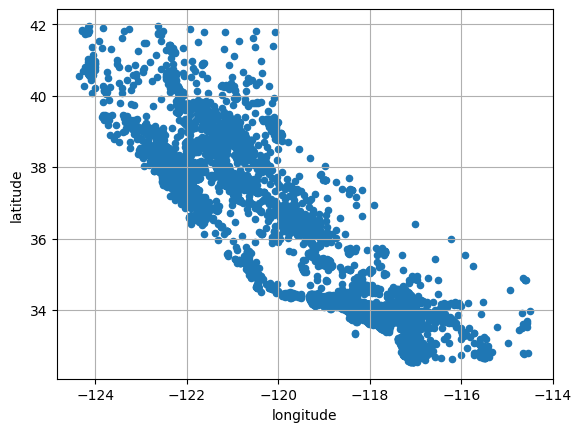

In [29]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True)

<Axes: xlabel='longitude', ylabel='latitude'>

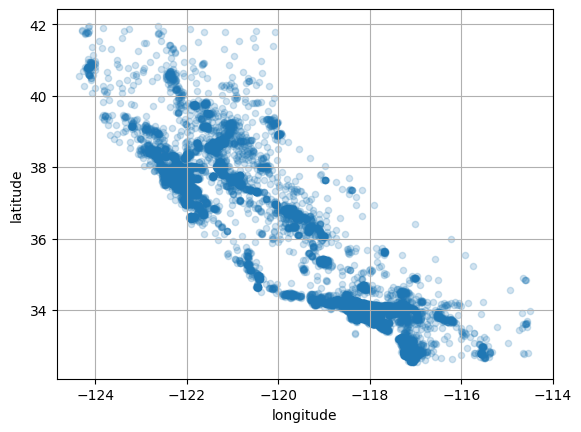

In [30]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha= 0.2)

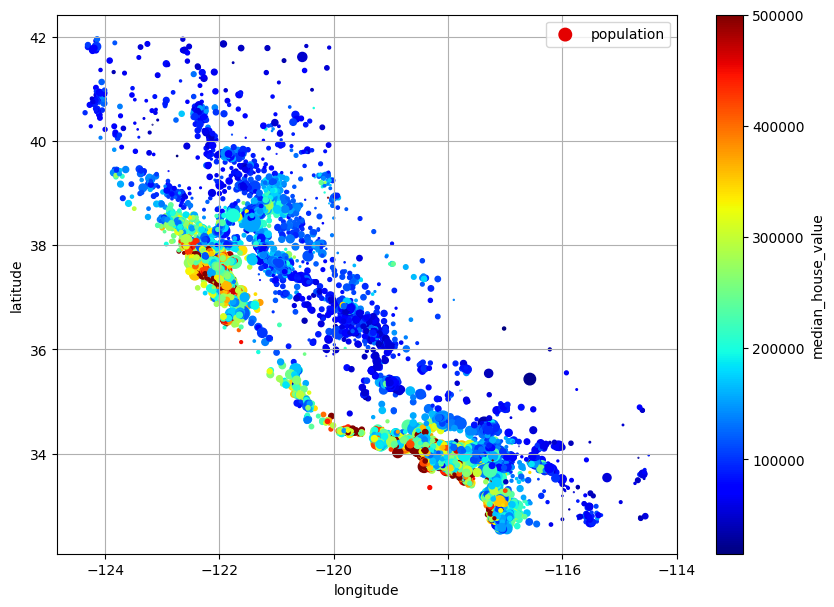

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [33]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,7274
INLAND,5301
NEAR OCEAN,2089
NEAR BAY,1846
ISLAND,2


In [34]:
corr_matrix = housing.corr(numeric_only=True)

In [35]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


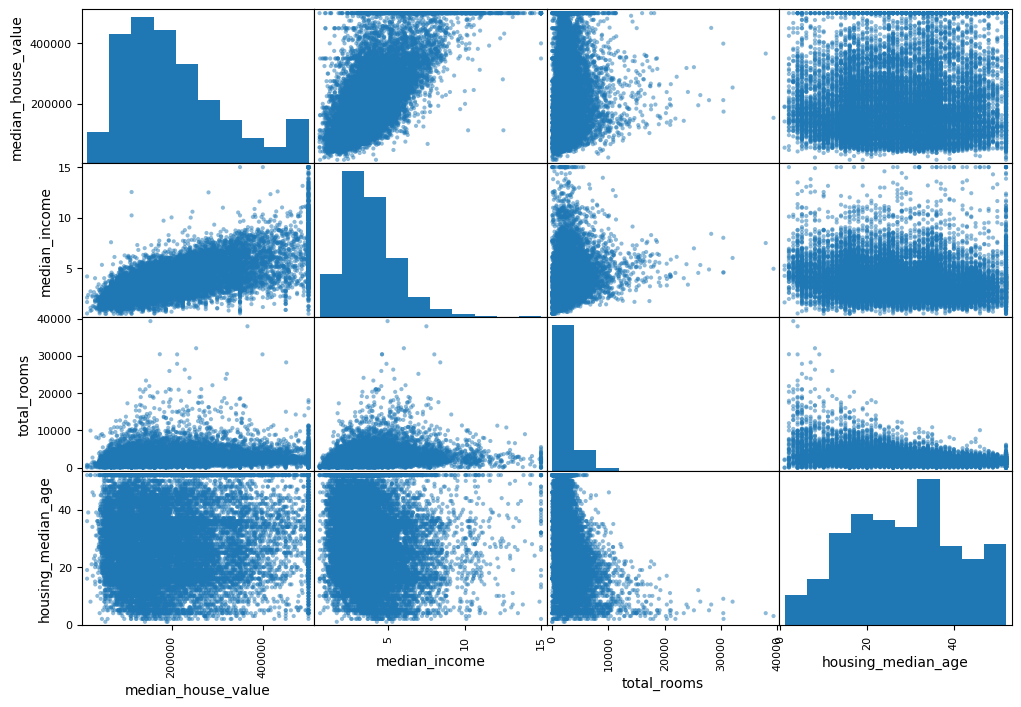

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

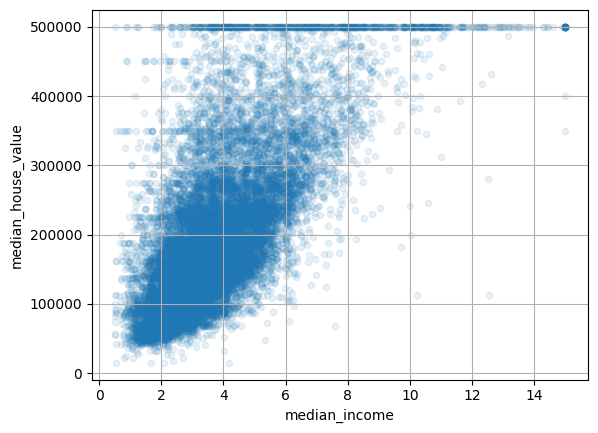

In [38]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)

In [39]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [40]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


In [41]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_house',
       'bedrooms_ratio', 'people_per_house'],
      dtype='object')

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [43]:
housing_labels


,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0
...,...
14207,500001.0
13105,88800.0
19301,148800.0
19121,500001.0


In [44]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,168
population,0
households,0
median_income,0
ocean_proximity,0


In [45]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

/tmp/ipython-input-1592858889.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['total_bedrooms'].fillna(median, inplace=True)


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [47]:
housing_num = housing.select_dtypes(include=[np.number])

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [50]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [51]:
X = imputer.transform(housing_num)

In [52]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [53]:
imputer.strategy

'median'

In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index) # hmm now I know how to covernt a numpy array in panda Dataframe
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [56]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,7274
INLAND,5301
NEAR OCEAN,2089
NEAR BAY,1846
ISLAND,2


In [57]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [58]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [60]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
pd.get_dummies(housing["ocean_proximity"])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13096,False,False,False,True,False
14973,True,False,False,False,False
3785,False,True,False,False,False
14689,False,True,False,False,False
20507,False,False,False,False,True
...,...,...,...,...,...
14207,True,False,False,False,False
13105,False,True,False,False,False
19301,False,False,False,False,True
19121,True,False,False,False,False


In [62]:
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [63]:
cat_encoder.feature_names_in_


array(['ocean_proximity'], dtype=object)

In [64]:
cat_encoder.get_feature_names_out()


array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [65]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
cat_encoder.handle_unknown = "ignore"


In [66]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [67]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


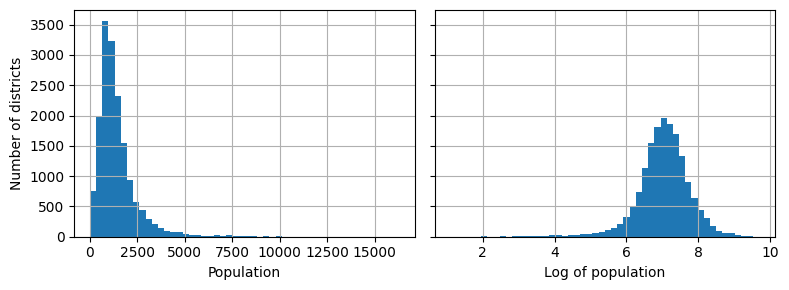

In [68]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

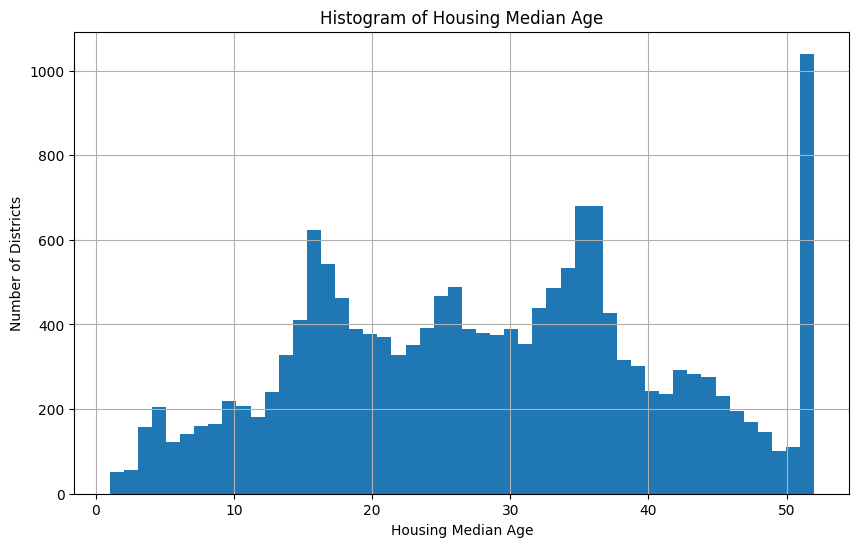

In [69]:

import matplotlib.pyplot as plt
housing["housing_median_age"].hist(bins=50, figsize=(10,6))
plt.xlabel("Housing Median Age")
plt.ylabel("Number of Districts")
plt.title("Histogram of Housing Median Age")
plt.show()

In [70]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [71]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [72]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [73]:
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [74]:
housing[["median_income"]].head(10)

,median_income
13096,2.0987
14973,6.0876
3785,2.4330
14689,2.2618
20507,3.5292
1286,3.3466
18078,6.1133
4396,5.4063
18031,2.7472
6753,1.1875


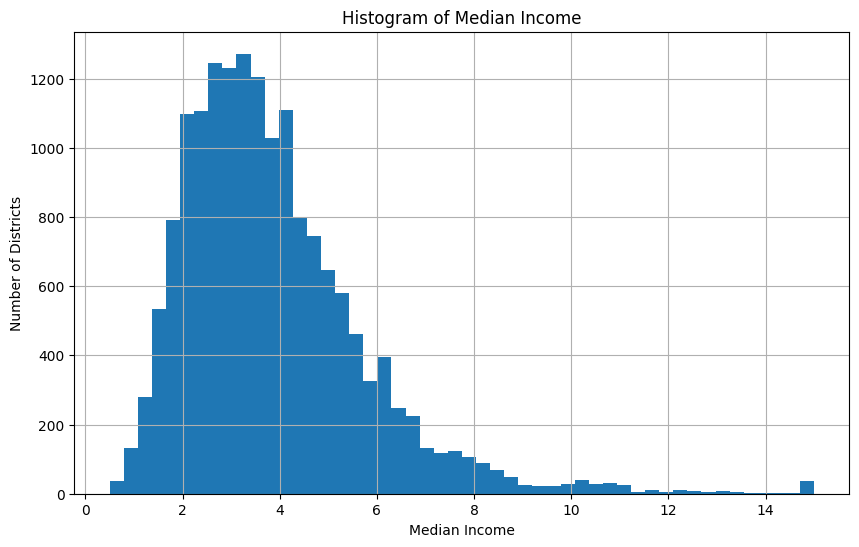

In [75]:
housing[["median_income"]].hist(bins=50, figsize=(10,6))
plt.xlabel("Median Income")
plt.ylabel("Number of Districts")
plt.title("Histogram of Median Income")
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]],scaled_labels)
new_data = housing[["median_income"]].iloc[:5]
scaled_predictions = model.predict(new_data)

predictions =target_scaler.inverse_transform(scaled_predictions)

In [77]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [78]:
scaled_labels

array([[ 2.18511202],
       [ 2.40625396],
       [-0.90740625],
       ...,
       [-0.49894408],
       [ 2.54675281],
       [ 0.23385961]])

In [79]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(new_data)

In [80]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [81]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [82]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [83]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [84]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [85]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [86]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state
  def fit(self,X,y=None,sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters,random_state=self.random_state)
    self.kmeans_.fit(X,sample_weight=sample_weight)
    return self
  def transform(self,X):
    return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
  def get_feature_names_out(self,names=None):
    return [f"Cluster {i}" for i in range(self.n_clusters)]

In [87]:
cluster_simil = ClusterSimilarity(n_clusters=10,gamma = 1,random_state = 42)
similarities = cluster_simil.fit_transform(housing[["latitude","longitude"]],sample_weight=housing_labels)

In [88]:
similarities[:3].round(2)


array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

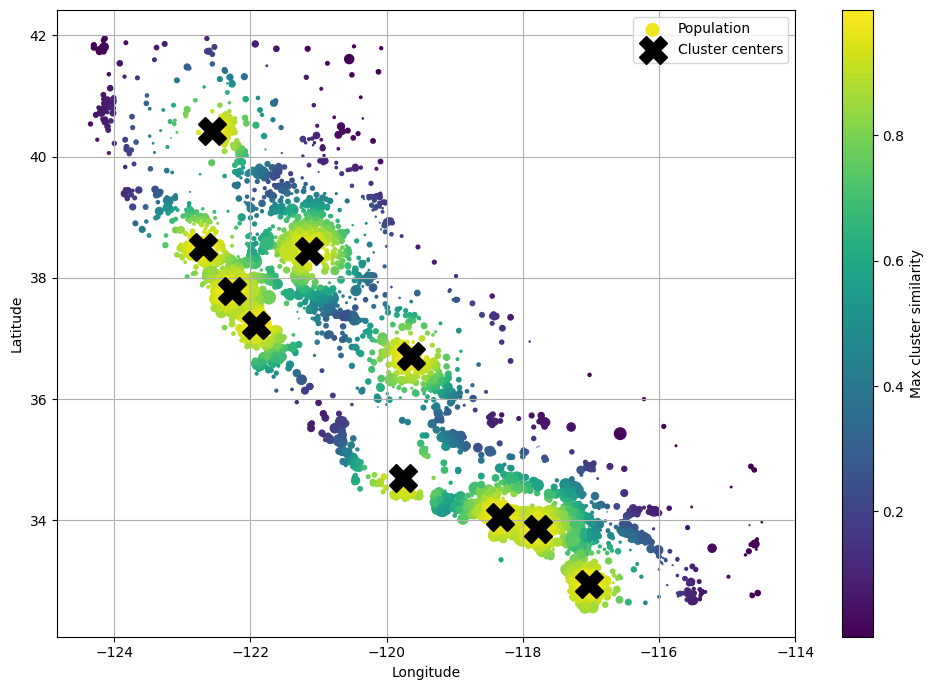

In [89]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population", # Size of the dot based on population
                     c="Max cluster similarity", # color based on max cluster simil..
                     cmap="viridis", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

In [90]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [91]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [92]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [93]:
housing_num_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [94]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [95]:
df_housing_num_prepared


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [97]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [98]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,7274
INLAND,5301
NEAR OCEAN,2089
NEAR BAY,1846
ISLAND,2


In [99]:
from sklearn.compose import make_column_selector,make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [100]:
housing_prepared = preprocessing.fit_transform(housing)

In [101]:
pd.DataFrame( housing_prepared, columns=preprocessing.get_feature_names_out(),index=housing.index)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [102]:
def column_ratio(X):
  return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer,feature_names_in):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(column_ratio,feature_names_out=ratio_name),StandardScaler())

log_pipeline = make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(np.log,feature_names_out="one-to-one"),StandardScaler())
cluster_simit = ClusterSimilarity(n_clusters=10,gamma=1.0,random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [103]:
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [104]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [105]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0', 'geo__Cluster 1',
       'geo__Cluster 2', 'geo__Cluster 3', 'geo__Cluster 4',
       'geo__Cluster 5', 'geo__Cluster 6', 'geo__Cluster 7',
       'geo__Cluster 8', 'geo__Cluster 9',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

In [106]:
housing_labels

,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0
...,...
14207,500001.0
13105,88800.0
19301,148800.0
19121,500001.0


In [107]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fc...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fca68893ef0>)])),
                ('linearregression', LinearRegression())])

In [108]:
housing_predictions = lin_reg.predict(housing)

In [109]:
housing_predictions[:5]

array([245970.16089313, 372738.06971508, 135706.80183576,  91440.93299447,
       330873.54029132])

In [110]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [111]:
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.3%, -23.0%, 33.4%, -4.9%, -8.5%


In [112]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        print("here")
        return mean_squared_error(labels, predictions, squared=False)

In [113]:
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68972.88910758484

In [114]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fc...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fca68893ef0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [115]:
housing_predictions = tree_reg.predict(housing)

In [116]:
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

In [117]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)

In [118]:
tree_rmses

array([64607.89604624, 66409.0627187 , 66203.41031283, 65863.76434319,
       68086.79141027, 66534.53308312, 66923.49892937, 68532.21066423,
       66141.53554919, 66208.69621463])

In [119]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66551.139927
std,1110.386369
min,64607.896046
25%,66157.004240
50%,66308.879467
75%,66826.257468
max,68532.210664


In [120]:
   from sklearn.ensemble import RandomForestRegressor

   forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
   forest_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fc...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fca68893ef0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [121]:
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17551.2122500877

In [122]:
# forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,scoring="neg_root_mean_squared_error", cv=10)

In [123]:
# pd.Series(forest_rmses).describe()

In [124]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
import shutil

cachedir = mkdtemp()

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
],memory=cachedir)
# param_grid = [
#     {'preprocessing__geo__n_clusters': [5, 8, 10],
#      'random_forest__max_features': [4, 6, 8]},
#     {'preprocessing__geo__n_clusters': [10, 15],
#      'random_forest__max_features': [6, 8, 10]},
# ]
# grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
#                            scoring='neg_root_mean_squared_error')
# grid_search.fit(housing, housing_labels)

In [125]:
# grid_search.best_params_

In [126]:
# grid_search.best_estimator_

In [127]:
# cv_res = pd.DataFrame(grid_search.cv_results_)

In [128]:
# cv_res


In [129]:
# cv_res = cv_res[["param_preprocessing__geo__n_clusters",
#                  "param_random_forest__max_features", "split0_test_score",
#                  "split1_test_score", "split2_test_score", "mean_test_score"]]

In [130]:
# cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_res

In [131]:
# cv_res = cv_res[["param_preprocessing__geo__n_clusters",
#                  "param_random_forest__max_features", "split0_test_score",
#                  "split1_test_score", "split2_test_score", "mean_test_score"]]
# score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
# cv_res.columns = ["n_clusters", "max_features"] + score_cols
# cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

# cv_res.head()

In [132]:
from scipy.stats import randint

print(randint(low=3,high=50))

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(memory='/tmp/tmpqmvrely6',
                                      steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                Function...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fca68a193d0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fca68a1b740>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [134]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41375,42242,43133,42250
8,32,7,41832,42275,43250,42452
0,41,16,42276,42938,43304,42839
5,42,4,41885,43362,43621,42956
2,23,8,42524,42928,43752,43068
6,24,3,42510,43694,44222,43475
7,26,13,42869,43506,44228,43535
4,13,5,43205,43589,44519,43771
3,21,12,43466,43828,44529,43941
9,4,2,48942,48833,50015,49263


In [135]:
print(rnd_search.best_params_)      # best hyperparameters
print(rnd_search.best_score_)       # best CV score

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}
-42249.981054725075


In [136]:
final_model = rnd_search.best_estimator_ # includes preprocessing

In [137]:
final_model

Pipeline(memory='/tmp/tmpqmvrely6',
         steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<fun...
                                                                    n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fca651cab10>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

In [138]:
final_model['preprocessing']

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7fca68a95800>,
                                                                      func=<function column_ratio...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo',
                                 ClusterSimilarity(gamma=1, n_clusters=45,
                                                   random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fca651cab10>)])

In [139]:
feature_importances=final_model['random_forest'].feature_importances_


In [140]:
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [141]:
sorted(zip(final_model['preprocessing'].get_feature_names_out(),feature_importances.round(3)),reverse=True)

[('rooms_per_house__ratio', np.float64(0.054)),
 ('remainder__housing_median_age', np.float64(0.011)),
 ('people_per_house__ratio', np.float64(0.046)),
 ('log__total_rooms', np.float64(0.007)),
 ('log__total_bedrooms', np.float64(0.006)),
 ('log__population', np.float64(0.007)),
 ('log__median_income', np.float64(0.186)),
 ('log__households', np.float64(0.006)),
 ('geo__Cluster 9', np.float64(0.02)),
 ('geo__Cluster 8', np.float64(0.008)),
 ('geo__Cluster 7', np.float64(0.015)),
 ('geo__Cluster 6', np.float64(0.012)),
 ('geo__Cluster 5', np.float64(0.004)),
 ('geo__Cluster 44', np.float64(0.011)),
 ('geo__Cluster 43', np.float64(0.011)),
 ('geo__Cluster 42', np.float64(0.005)),
 ('geo__Cluster 41', np.float64(0.01)),
 ('geo__Cluster 40', np.float64(0.01)),
 ('geo__Cluster 4', np.float64(0.007)),
 ('geo__Cluster 39', np.float64(0.007)),
 ('geo__Cluster 38', np.float64(0.006)),
 ('geo__Cluster 37', np.float64(0.018)),
 ('geo__Cluster 36', np.float64(0.024)),
 ('geo__Cluster 35', np.float

In [142]:
threshold = 0.01
important_features = [name for name, score in sorted(zip(final_model['preprocessing'].get_feature_names_out(),feature_importances.round(3)),reverse=True) if score >= threshold]

In [143]:
important_features

['rooms_per_house__ratio',
 'remainder__housing_median_age',
 'people_per_house__ratio',
 'log__median_income',
 'geo__Cluster 9',
 'geo__Cluster 7',
 'geo__Cluster 6',
 'geo__Cluster 44',
 'geo__Cluster 43',
 'geo__Cluster 41',
 'geo__Cluster 40',
 'geo__Cluster 37',
 'geo__Cluster 36',
 'geo__Cluster 35',
 'geo__Cluster 34',
 'geo__Cluster 32',
 'geo__Cluster 31',
 'geo__Cluster 30',
 'geo__Cluster 3',
 'geo__Cluster 28',
 'geo__Cluster 26',
 'geo__Cluster 25',
 'geo__Cluster 24',
 'geo__Cluster 23',
 'geo__Cluster 2',
 'geo__Cluster 19',
 'geo__Cluster 18',
 'geo__Cluster 14',
 'geo__Cluster 13',
 'geo__Cluster 12',
 'geo__Cluster 10',
 'geo__Cluster 1',
 'geo__Cluster 0',
 'cat__ocean_proximity_INLAND',
 'bedrooms__ratio']

In [144]:
X_reduced = housing[important_features]


KeyError: "None of [Index(['rooms_per_house__ratio', 'remainder__housing_median_age',\n       'people_per_house__ratio', 'log__median_income', 'geo__Cluster 9',\n       'geo__Cluster 7', 'geo__Cluster 6', 'geo__Cluster 44',\n       'geo__Cluster 43', 'geo__Cluster 41', 'geo__Cluster 40',\n       'geo__Cluster 37', 'geo__Cluster 36', 'geo__Cluster 35',\n       'geo__Cluster 34', 'geo__Cluster 32', 'geo__Cluster 31',\n       'geo__Cluster 30', 'geo__Cluster 3', 'geo__Cluster 28',\n       'geo__Cluster 26', 'geo__Cluster 25', 'geo__Cluster 24',\n       'geo__Cluster 23', 'geo__Cluster 2', 'geo__Cluster 19',\n       'geo__Cluster 18', 'geo__Cluster 14', 'geo__Cluster 13',\n       'geo__Cluster 12', 'geo__Cluster 10', 'geo__Cluster 1',\n       'geo__Cluster 0', 'cat__ocean_proximity_INLAND', 'bedrooms__ratio'],\n      dtype='object')] are in the [columns]"

In [145]:
# Transform raw data to get processed features
X_processed = final_model["preprocessing"].transform(housing)

# Convert to DataFrame with correct column names
X_processed_df = pd.DataFrame(X_processed, columns=final_model["preprocessing"].get_feature_names_out())

# Now filter important features
X_reduced = X_processed_df[important_features]

In [146]:
X_reduced

,rooms_per_house__ratio,remainder__housing_median_age,people_per_house__ratio,log__median_income,geo__Cluster 9,geo__Cluster 7,geo__Cluster 6,geo__Cluster 44,geo__Cluster 43,geo__Cluster 41,...,geo__Cluster 19,geo__Cluster 18,geo__Cluster 14,geo__Cluster 13,geo__Cluster 12,geo__Cluster 10,geo__Cluster 1,geo__Cluster 0,cat__ocean_proximity_INLAND,bedrooms__ratio
0,-0.866027,1.861119,-0.330204,-1.071522,3.744461e-04,8.582795e-01,8.630011e-09,9.620597e-01,7.726746e-15,1.558800e-02,...,6.647003e-18,1.961468e-04,8.213165e-13,3.536632e-02,1.244034e-23,9.644417e-17,1.633902e-14,6.028456e-01,0.0,1.846624
1,0.024550,0.907630,-0.253616,1.194712,1.107138e-04,7.424837e-12,1.483600e-01,4.244715e-13,9.209123e-01,1.938346e-09,...,2.956524e-01,8.725171e-04,6.825158e-01,7.687844e-14,1.446410e-02,5.851630e-01,9.596010e-01,1.700117e-10,0.0,-0.508121
2,-0.041193,0.351428,-0.051041,-0.756981,7.488616e-04,5.234102e-01,1.278282e-09,7.173895e-01,3.242197e-15,8.016413e-02,...,6.418255e-18,3.865400e-05,6.699817e-13,2.712169e-01,1.811697e-23,5.666887e-17,4.937424e-15,3.103830e-01,1.0,-0.202155
3,-0.034858,-0.919891,-0.141475,-0.912253,6.548659e-08,6.796061e-18,6.551500e-04,2.312643e-19,3.368282e-01,8.538234e-14,...,8.079847e-01,1.522829e-07,1.363830e-01,3.828007e-19,5.564423e-01,6.847591e-01,2.302017e-01,3.010607e-16,1.0,-0.149006
4,-0.666554,0.589800,-0.306148,0.034537,6.644262e-06,8.765357e-14,5.306191e-02,3.871626e-15,9.047234e-01,3.284173e-11,...,3.941870e-01,9.492050e-05,4.124289e-01,5.337420e-16,3.870075e-02,7.301798e-01,9.446799e-01,2.684693e-12,0.0,0.963208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.452111,0.987087,-0.269780,0.648953,2.431365e-05,1.169798e-12,1.227590e-01,5.764144e-14,8.692679e-01,2.075498e-10,...,2.555842e-01,4.260410e-04,4.538305e-01,5.295955e-15,1.476695e-02,5.573101e-01,9.828213e-01,3.122691e-11,0.0,0.804368
16508,0.036792,-0.443146,-0.073741,-0.637675,6.249887e-01,8.476289e-05,2.391209e-02,2.000430e-05,1.542417e-03,1.117013e-02,...,1.647748e-04,6.892233e-02,1.927820e-02,5.088806e-05,2.932993e-07,3.491622e-04,1.332348e-03,4.047066e-04,1.0,-0.192328
16509,-0.109987,-1.237721,0.158542,0.333540,1.081209e-11,1.532457e-22,2.679054e-05,2.729018e-24,3.666205e-02,6.105746e-19,...,7.601167e-02,5.424472e-10,3.435848e-03,3.751180e-25,1.334977e-01,8.701389e-02,3.326367e-02,1.341672e-20,0.0,-0.242492
16510,-0.360937,0.669257,-0.210332,0.377051,7.593664e-05,4.948264e-12,1.483834e-01,2.720606e-13,9.128359e-01,1.102006e-09,...,2.791561e-01,7.714892e-04,6.128745e-01,3.920240e-14,1.394649e-02,5.741976e-01,9.793839e-01,1.178006e-10,0.0,0.259775


In [147]:
final_model["random_forest"].fit(X_reduced, housing_labels)


RandomForestRegressor(max_features=9, random_state=42)

In [149]:
#Lets see how it performs on test data,
preds = final_model["random_forest"].predict(X_reduced)

In [150]:

rmse = root_mean_squared_error(housing_labels,preds)
rmse

15458.394252283364

In [151]:
#validation set
# Transform raw data to get processed features
X_processed = final_model["preprocessing"].transform(housing)

# Convert to DataFrame with correct column names
X_processed_df = pd.DataFrame(X_processed, columns=final_model["preprocessing"].get_feature_names_out())

# Now filter important features
X_reduced = X_processed_df[important_features]

In [153]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_processed = final_model["preprocessing"].transform(X_test)
X_test_proccessed_df = pd.DataFrame(X_test_processed,columns=final_model["preprocessing"].get_feature_names_out())
X_test_reduced = X_test_proccessed_df[important_features]



In [154]:
final_preds = final_model["random_forest"].predict(X_test_reduced)

In [155]:
rmse = root_mean_squared_error(y_test,final_preds)
rmse

42353.23687307397

In [156]:
final_rmse = root_mean_squared_error(y_test, final_preds)
print(final_rmse)

42353.23687307397


In [160]:
# Transform raw data to get processed features
X_processed = final_model["preprocessing"].transform(housing)

# Convert to DataFrame with correct column names
X_processed_df = pd.DataFrame(X_processed, columns=final_model["preprocessing"].get_feature_names_out())

In [161]:
final_model["random_forest"].fit(X_processed_df, housing_labels)

RandomForestRegressor(max_features=9, random_state=42)

In [163]:
preds = final_model["random_forest"].predict(X_processed_df)

In [164]:
rmse = root_mean_squared_error(housing_labels,preds)
rmse

15294.062420421913

In [176]:
# Transform raw data to get processed features
X_test_processed = final_model["preprocessing"].transform(X_test)

# Convert to DataFrame with correct column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=final_model["preprocessing"].get_feature_names_out())

In [177]:
final_preds = final_model["random_forest"].predict(X_test_processed_df)

In [178]:
rmse = root_mean_squared_error(y_test,final_preds)
rmse

41445.533268606625